In [1]:
import Preprocessing

COMPANY = "Alstom"
# retrieve tweets on company with user name
tw_comp = Preprocessing.execute("SELECT screen_name, text FROM tweet INNER JOIN user ON tweet.user_id = user.id WHERE searchterm = '@" + COMPANY + "'")

In [2]:
# store tweets emited from company
c_tw = [e[1] for e in tw_comp if e[0] == COMPANY]
c_tw[:10]

['Tonight from 10pm, the Prima II loco will go through test runs in the Channel Tunnel from France to the United Kingdom http://t.co/hB9KuCdY',
 '#Alstom to provide #Amtrak with its new gen #highspeed #train for Northeast Corridor\xa0https://t.co/ll1K4tvRvf https://t.co/1wpXaT9Qj4',
 '#Alstom to maintain #Ottawa’s lightrail transit system https://t.co/JCHaQu4DnN #Otrain #ConfederationLine https://t.co/yfRG81kp1j',
 "#Alstom Coradia #iLint: A major breakthrough for tomorrow's rail transport #zeroemission #train #fuelcell https://t.co/NSBtwGdlPz",
 '#Alstom revealed to the world the first zero-emission and hydrogen powered passenger train. Learn how it works! https://t.co/oaaj4zbLzK',
 'Milestone in #Singapore: proud to have handed over the last of 18 #metro #trains with signaling system for North Ea… https://t.co/S7Xq6gCfqg',
 'Flaming red! #Alstom and #NTV unveil the 1st car of #Pendolino @ItaloTreno\xa0https://t.co/TBOxGWbcnF #highspeed #train https://t.co/mM4JLsH0Gt',
 '.@NomadDigita

## get most frequent adressed accounts

In [3]:
import collections
import re

# keep adresses
pattern = re.compile(r"([@?]\w+)\b")
ar_list = [ re.findall(pattern, tweet) for tweet in c_tw]

# Build frequency
fl = [e for tweet in ar_list for e in tweet]
frequ = collections.Counter(fl).most_common()

#remove first one (Alstom)
frequ = frequ[1:]

frequ[:20]

[('@NTLTranslohr', 7),
 ('@Easy_Mile', 6),
 ('@H2Europe', 4),
 ('@ItaloTreno', 4),
 ('@banedanmark', 4),
 ('@hydrogenics', 4),
 ('@GroupeRATP', 3),
 ('@AlstomIndia', 3),
 ('@PRASA_Group', 3),
 ('@FrauscherSensor', 2),
 ('@Railway_News', 2),
 ('@AFNOR', 2),
 ('@AlstomNordics', 2),
 ('@thecosmocompany', 2),
 ('@AlstomFondation', 2),
 ('@FranceinIndia', 2),
 ('@ITF_Forum', 2),
 ('@NomadDigital', 2),
 ('@RailwaysAfrica', 2),
 ('@uitpsummit', 2)]

In [4]:
# build nodes (company -> partner and partner -> company)
g = [ (COMPANY, e[0][1:]) for e in frequ[:20]]
g_rev = [ (e[0][1:], COMPANY) for e in frequ[:20]]

(g + g_rev)[:20]

[('Alstom', 'NTLTranslohr'),
 ('Alstom', 'Easy_Mile'),
 ('Alstom', 'H2Europe'),
 ('Alstom', 'ItaloTreno'),
 ('Alstom', 'banedanmark'),
 ('Alstom', 'hydrogenics'),
 ('Alstom', 'GroupeRATP'),
 ('Alstom', 'AlstomIndia'),
 ('Alstom', 'PRASA_Group'),
 ('Alstom', 'FrauscherSensor'),
 ('Alstom', 'Railway_News'),
 ('Alstom', 'AFNOR'),
 ('Alstom', 'AlstomNordics'),
 ('Alstom', 'thecosmocompany'),
 ('Alstom', 'AlstomFondation'),
 ('Alstom', 'FranceinIndia'),
 ('Alstom', 'ITF_Forum'),
 ('Alstom', 'NomadDigital'),
 ('Alstom', 'RailwaysAfrica'),
 ('Alstom', 'uitpsummit')]

In [5]:
# count frequency of adresses
l = [ e[1] for e in frequ[:20] if e[0] != "@" + COMPANY]
l_rev = [ len( [ e[1] for e in tw_comp if e[0] == c[0][1:] ] ) for c in frequ[:20] ]

(l + l_rev)[:20]

[7, 6, 4, 4, 4, 4, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

## build network graph

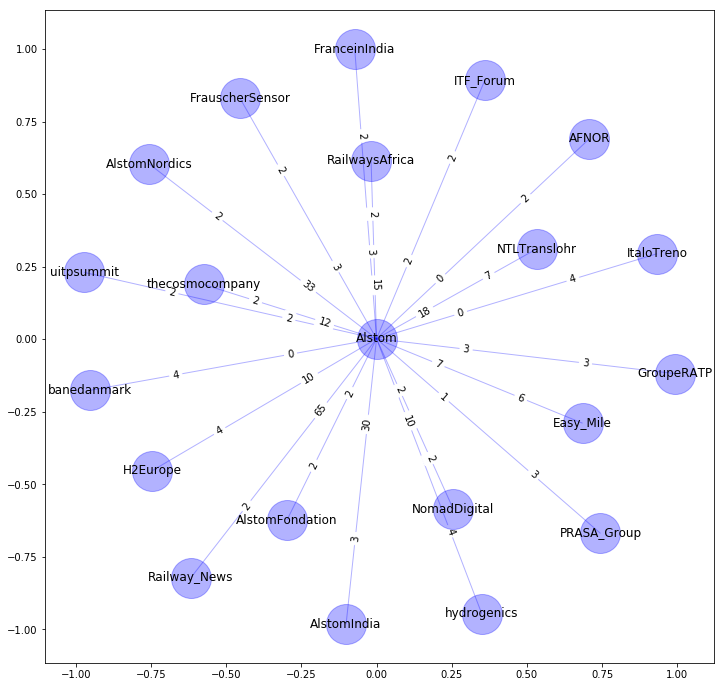

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_graph(graph,
               labels=None,
               graph_layout='spring',
               node_size=1600,
               node_color='blue',
               node_alpha=0.3,
               node_text_size=12,
               edge_color='blue',
               edge_alpha=0.3,
               edge_tickness=1,
               edge_text_pos=0.3,
               text_font='sans-serif'):

    # create networkx graph
    G = nx.Graph()

    # add edges
    for edge in graph:
        G.add_edge(edge[0], edge[1])

    graph_pos = nx.spring_layout(G)
  
    plt.figure(3,figsize=(12,12)) 

    # draw graph
    nx.draw_networkx_nodes(G, graph_pos, node_size=node_size, 
                           alpha=node_alpha, node_color=node_color)
    nx.draw_networkx_edges(G, graph_pos, width=edge_tickness,
                           alpha=edge_alpha,edge_color=edge_color)
    nx.draw_networkx_labels(G, graph_pos,font_size=node_text_size,
                            font_family=text_font)

    if labels is None:
        return
    # add number labels
    edge_labels = dict(zip(graph, labels))
    nx.draw_networkx_edge_labels(G, graph_pos, edge_labels=edge_labels, 
                                 label_pos=edge_text_pos)
    plt.show()

draw_graph(g + g_rev, l + l_rev)

## Going on for all companies

Intel :


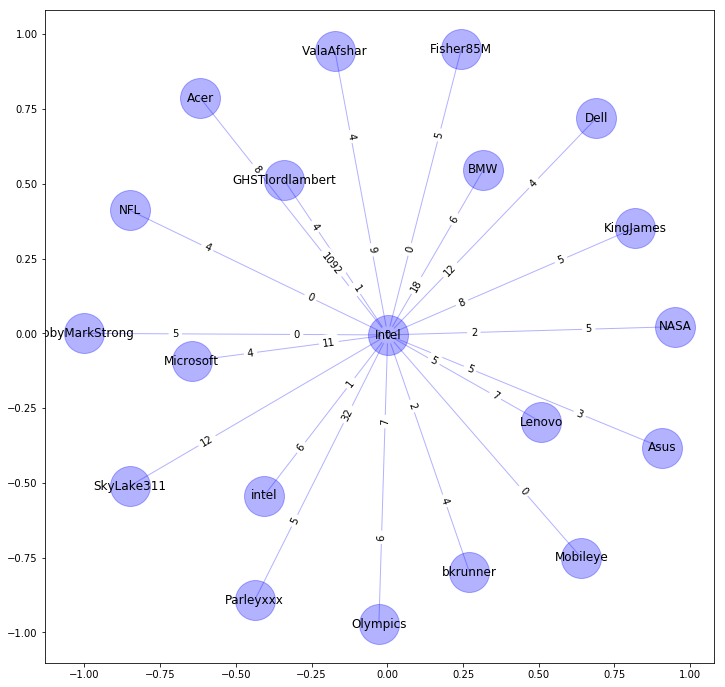

Salesforce :


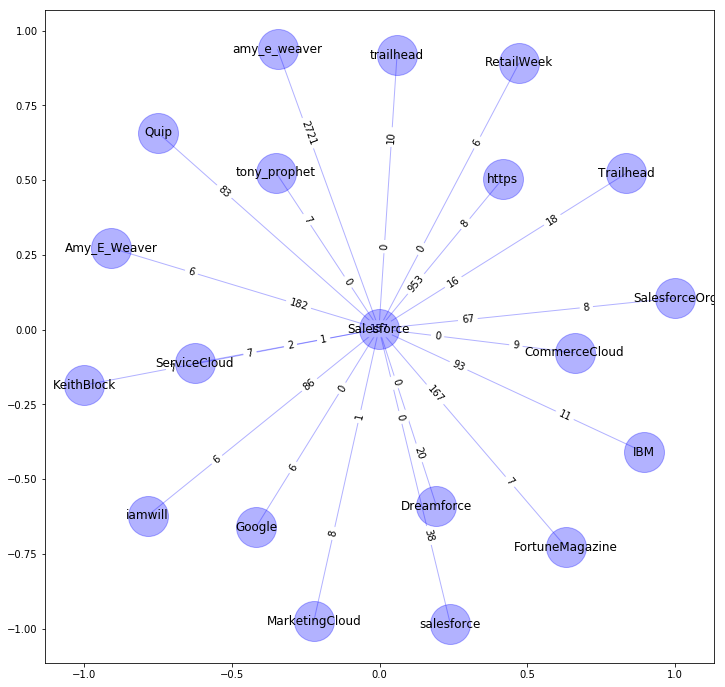

Adobe :


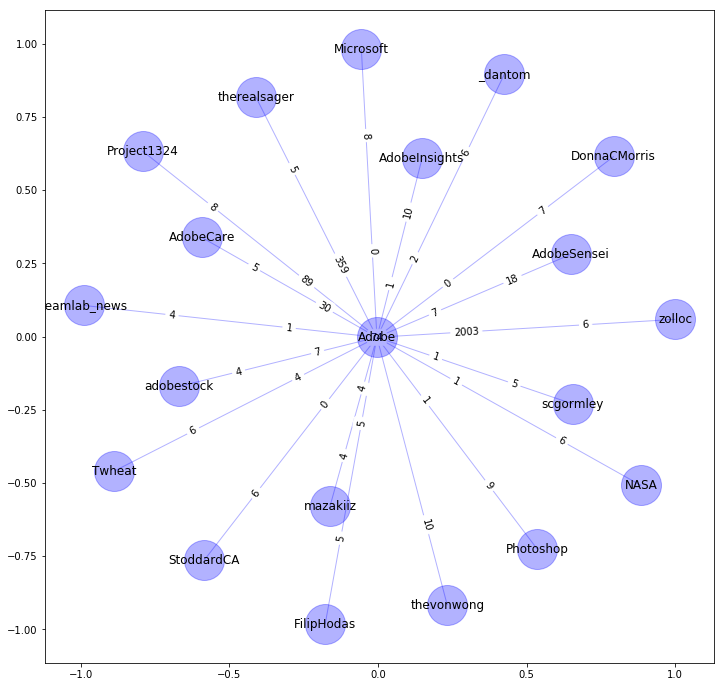

Capgemini :


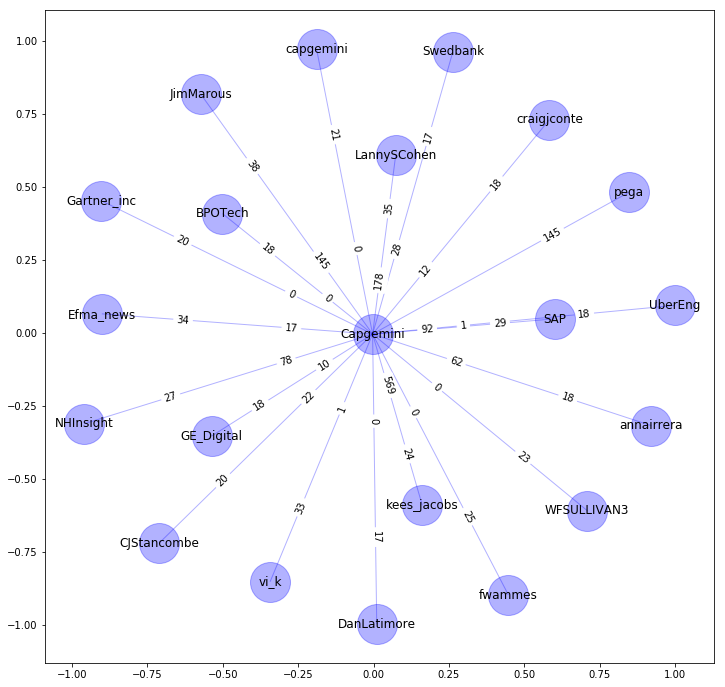

Forrester :


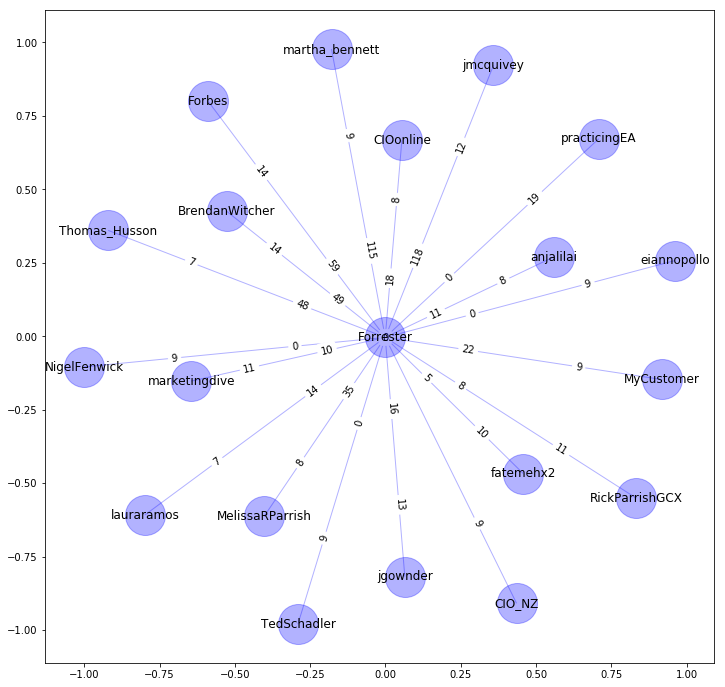

Cisco :


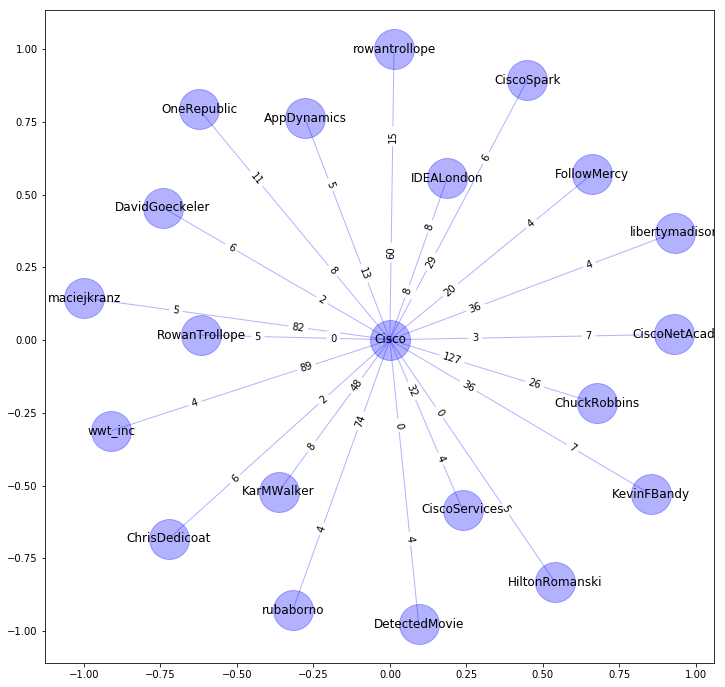

Generalelectric :


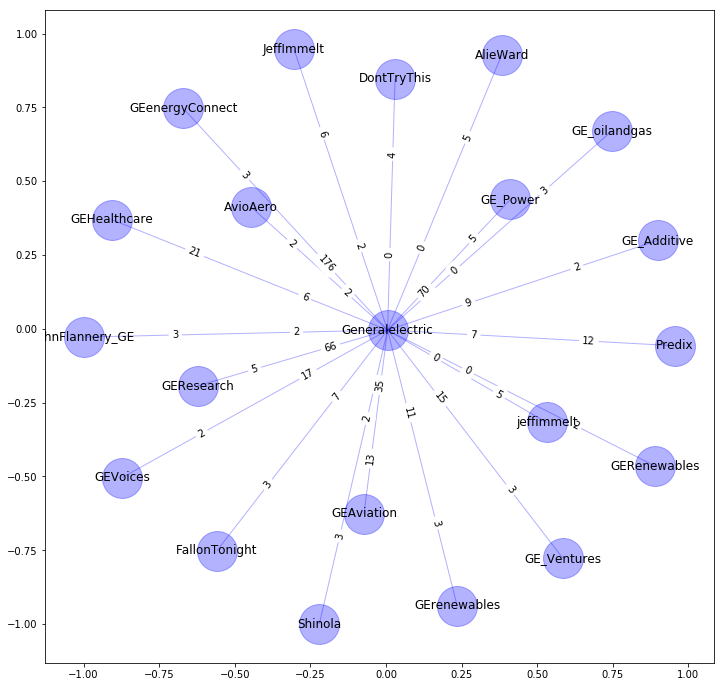

Alstom :


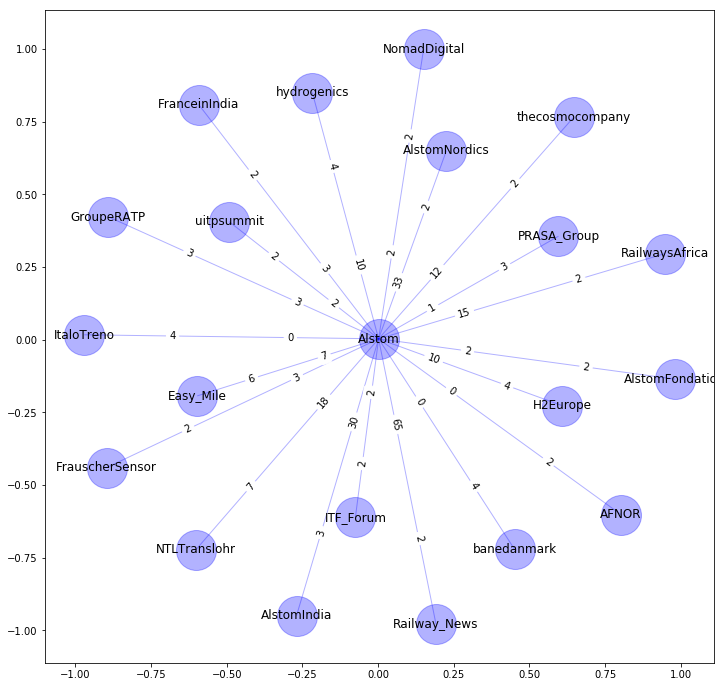

Oracle :


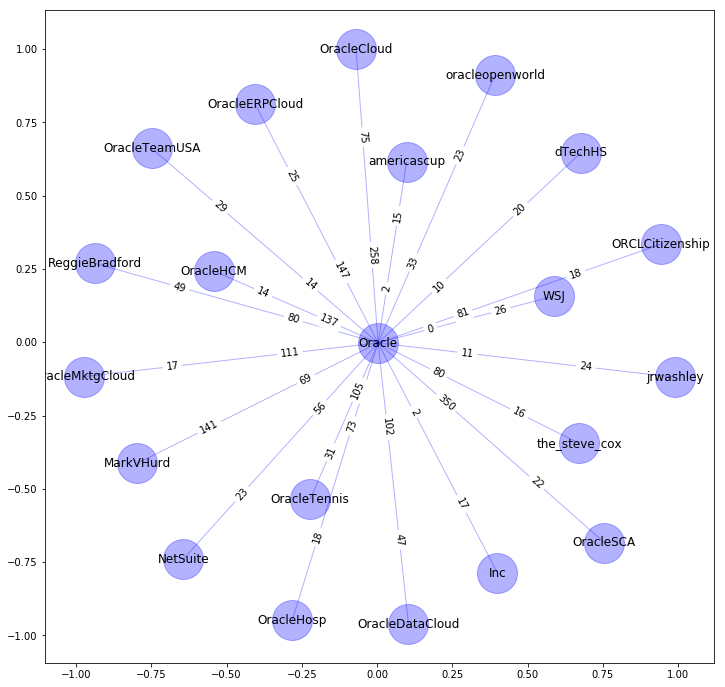

MaerskLine :


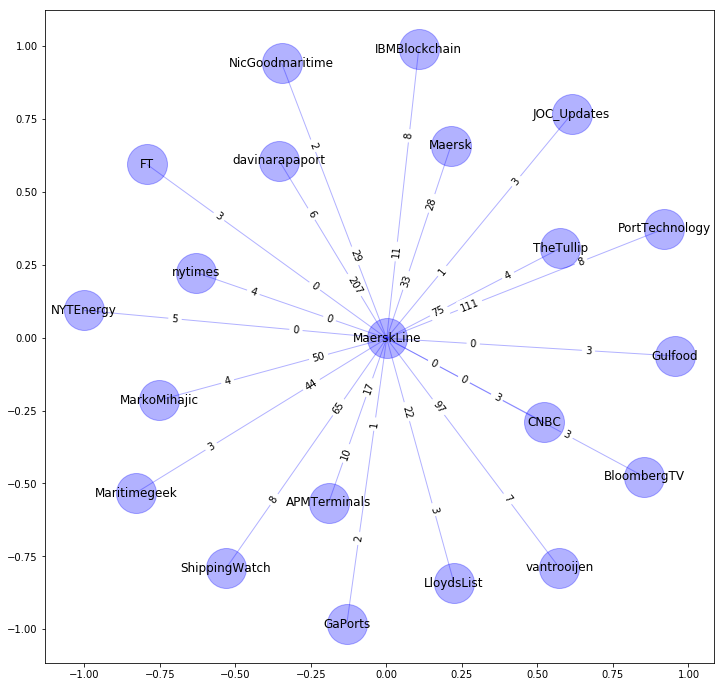

VMware :


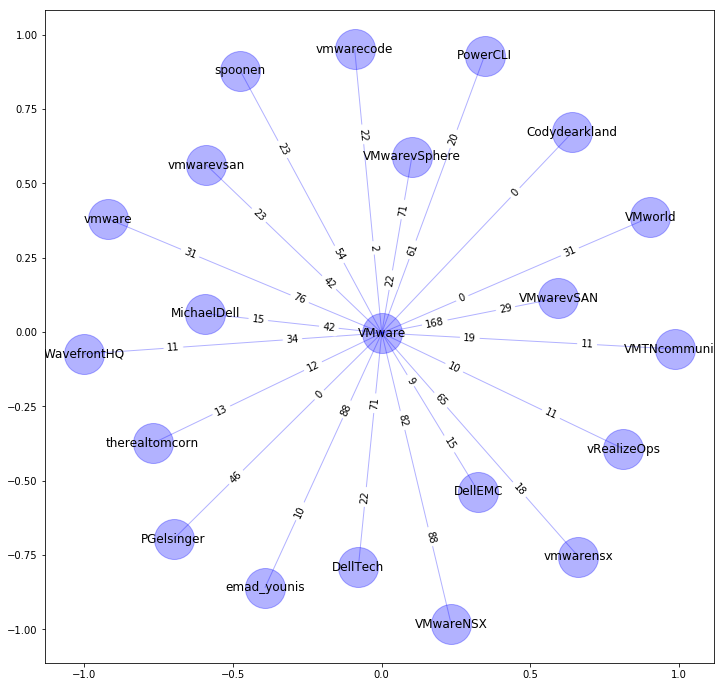

ArcelorMittal :


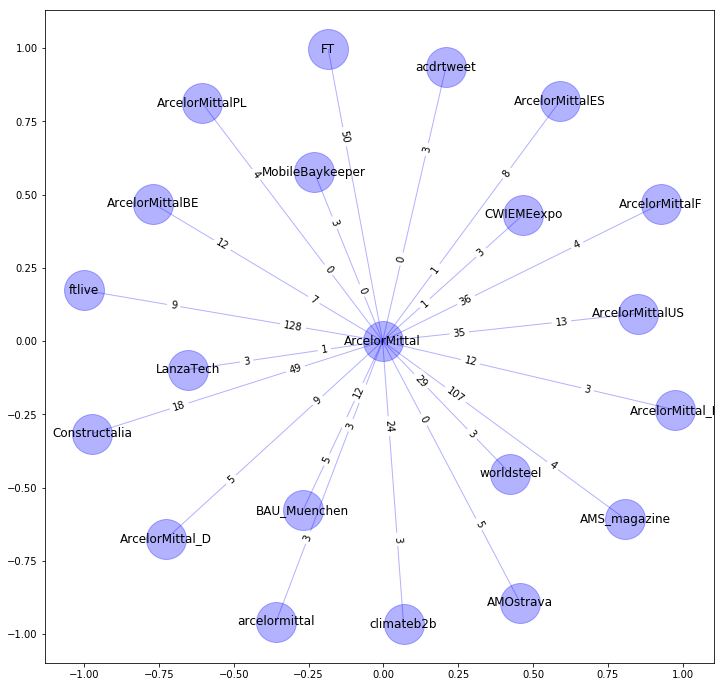

airliquidegroup :


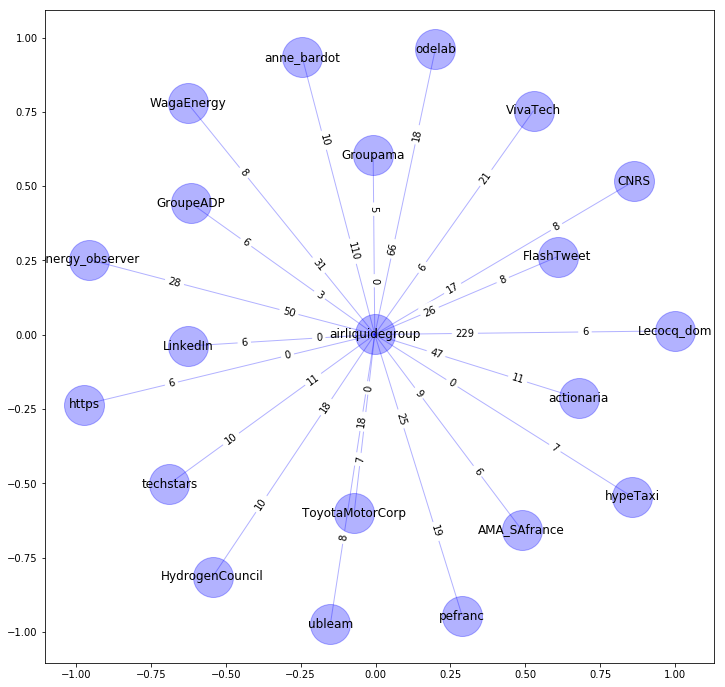

SAFRAN :


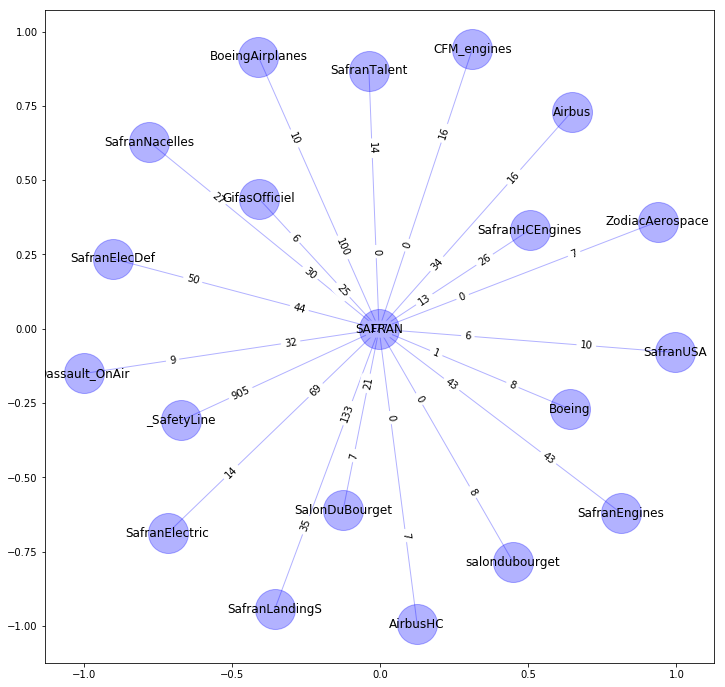

PublicisGroupe :


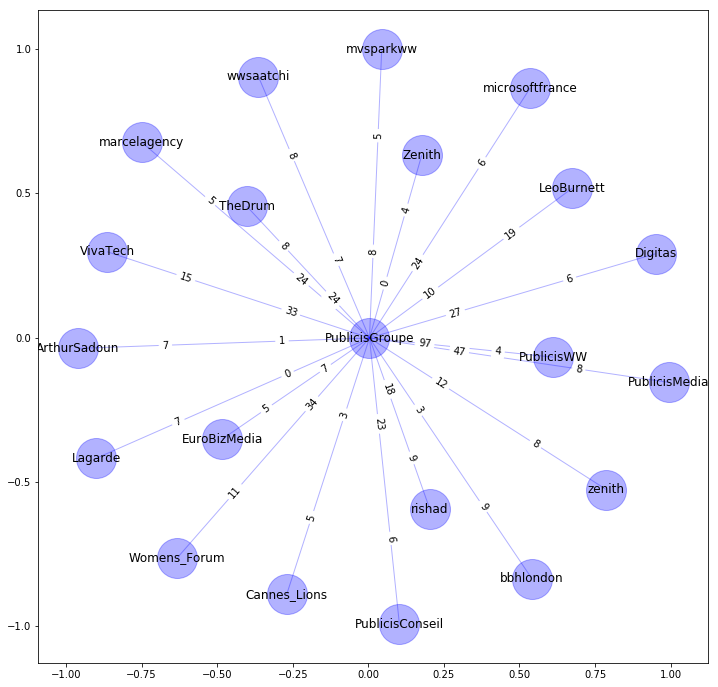

ENGIEgroup :


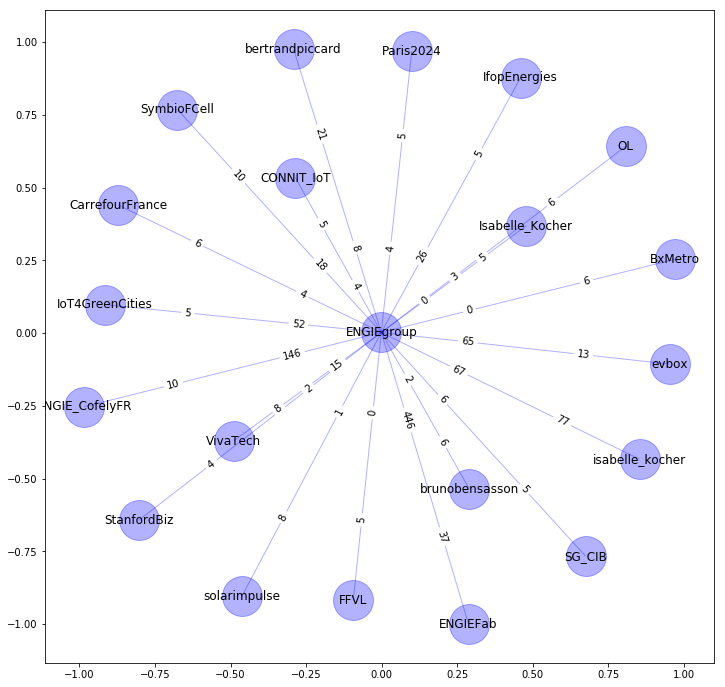

SolvayGroup :


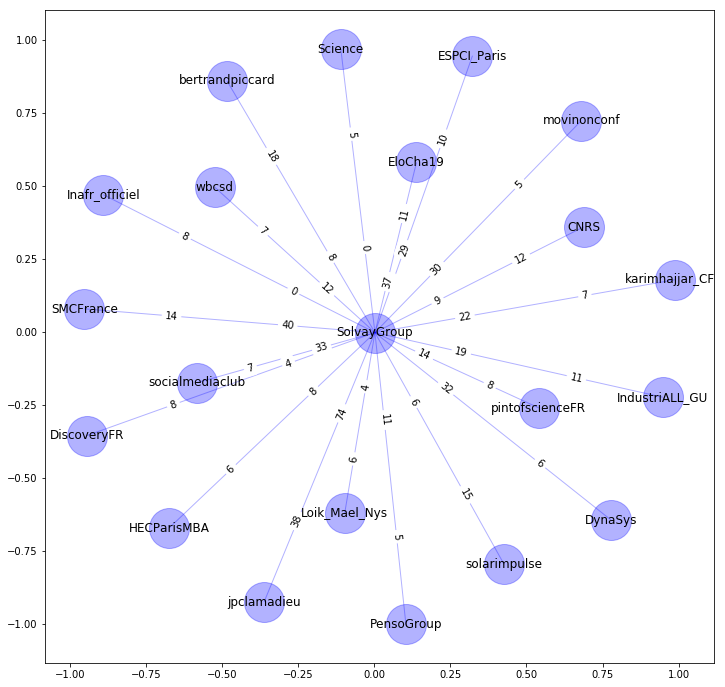

TechnipGroup :


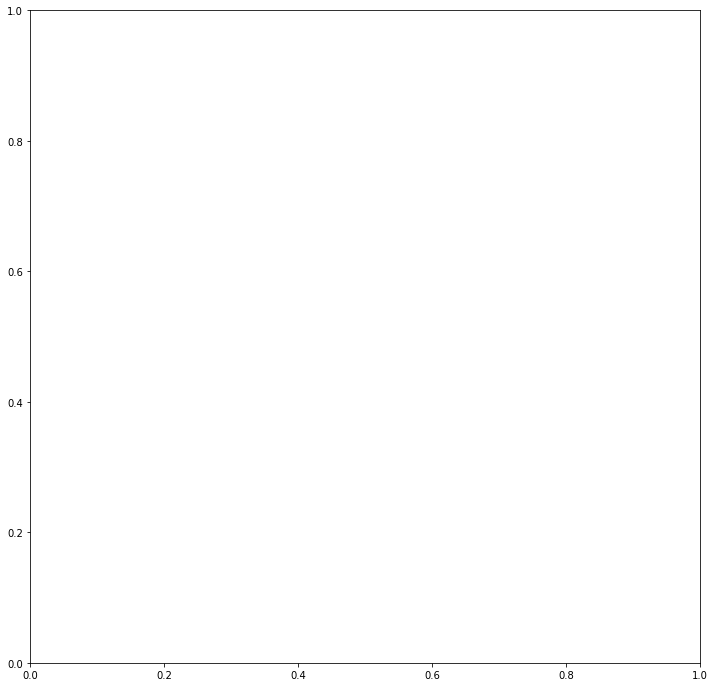

Rexel_Group :


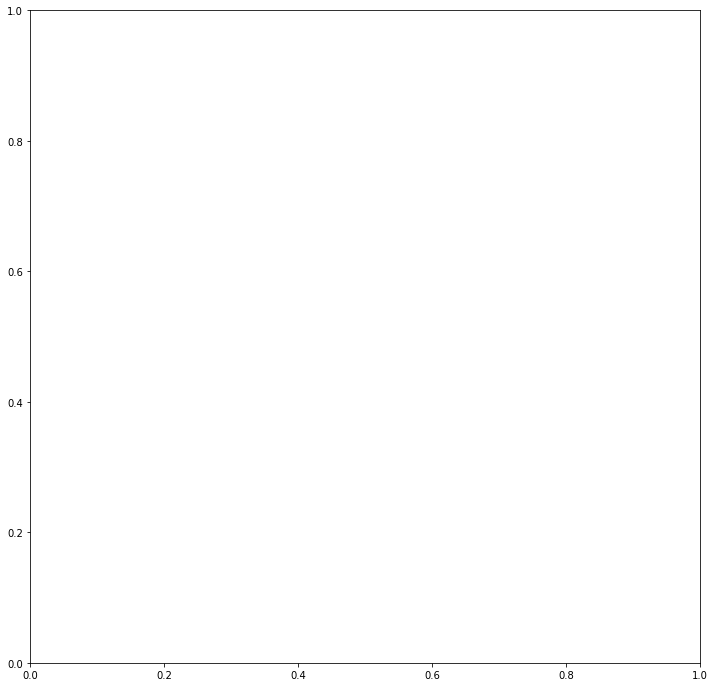

VolvoTrucksFR :


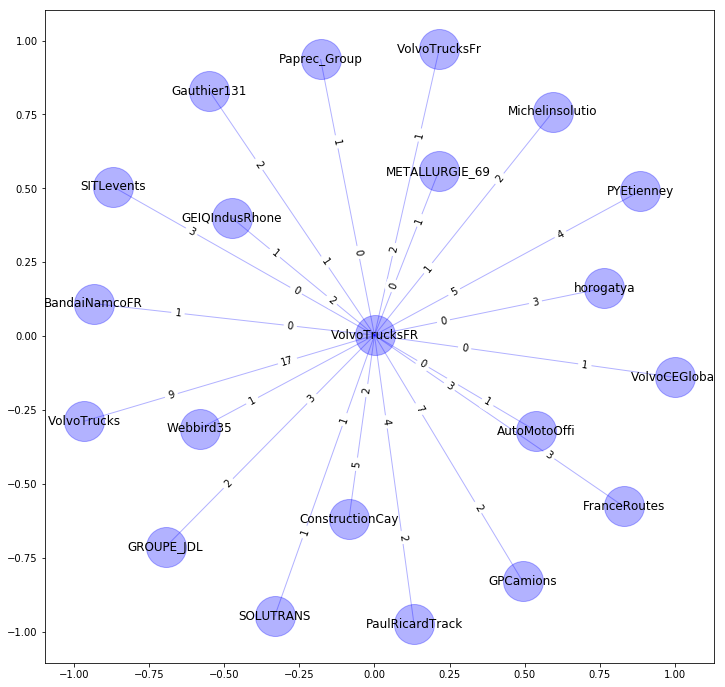

orexad_FR :


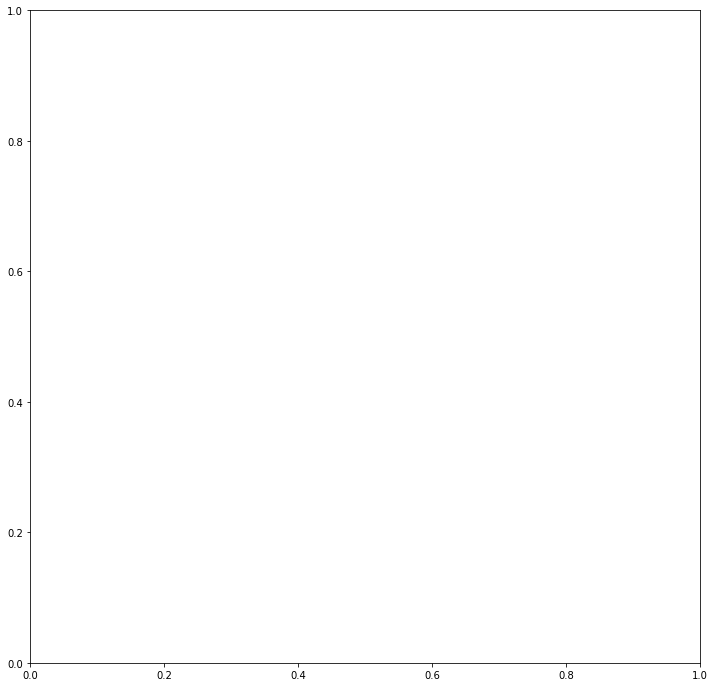

orexad :


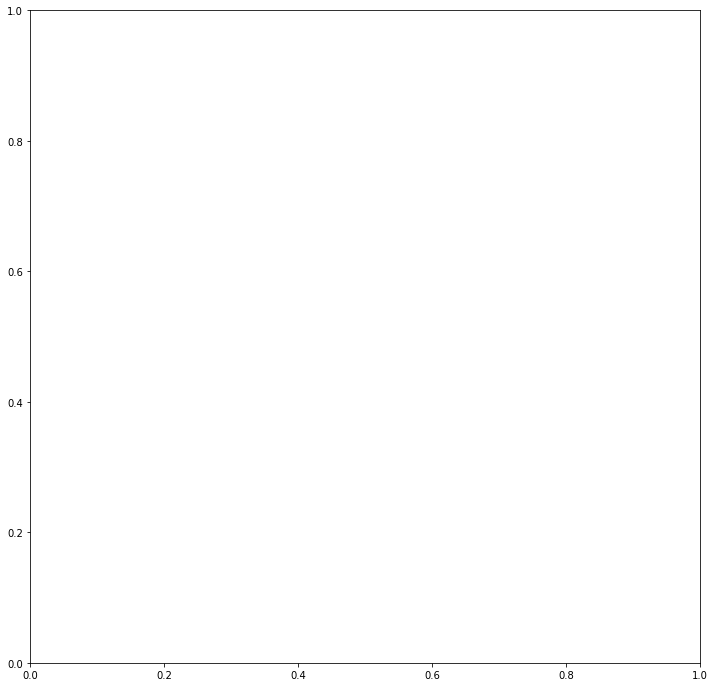

In [7]:
import numpy as np

companies = Preprocessing.execute("SELECT DISTINCT searchterm FROM tweet;")

def net_graph(COMPANY):
    tw_comp = Preprocessing.execute("SELECT screen_name, text FROM tweet INNER JOIN user ON tweet.user_id = user.id WHERE searchterm = '@" + COMPANY + "'")
    c_tw = [e[1] for e in tw_comp if e[0].lower() == COMPANY.lower()]

    pattern = re.compile(r"([@?]\w+)\b")
    ar_list = [ re.findall(pattern, tweet) for tweet in c_tw ]

    fl = [e for tweet in ar_list for e in tweet]
    frequ = collections.Counter(fl).most_common()

    frequ = frequ[1:]

    g = [ (COMPANY, e[0][1:]) for e in frequ[:20]]
    g_rev = [ (e[0][1:], COMPANY) for e in frequ[:20]]

    l = [ e[1] for e in frequ[:20] if e[0].lower() != "@" + COMPANY.lower()]
    l_rev = [ len( [ e[1] for e in tw_comp if e[0] == c[0][1:] ] ) for c in frequ[:20] ]

    draw_graph(g + g_rev, l + l_rev)

    return frequ[:100]

frequ = []
names = []
for c in companies:
    print (c[0][1:], ":")
    f = np.array(net_graph(c[0][1:]))
    if len(f) == 100:
        names.append(c[0][1:])
        frequ.append(f[:,0])

In [14]:
import csv
import numpy as np

rows = np.array(frequ).T

with open("../results/frequency_arobas.csv", 'w') as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    wr.writerow(names)
    for row in rows:
        wr.writerow(row)